In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [2]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
1888,544,1954,Graduation,69,Married,62820.0,0,0,2013-05-11,51,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
460,6619,1978,Graduation,45,Married,38415.0,1,1,2013-01-02,91,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5
1361,4743,1969,PhD,54,Married,56242.0,0,1,2013-03-03,72,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
1332,979,1975,Graduation,48,Single,33249.0,1,0,2013-02-20,11,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
827,4186,1950,Graduation,73,Together,34026.0,1,1,2013-08-05,11,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$0 - $34948.5


In [3]:
# Cek data type, null value, unique value for each variable
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Total rows 2240, Total Colum 31


,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.0,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.0,4,"[Graduation, PhD, Master, Basic]"
3,Age,int64,0.0,59,"[66, 69, 58, 39, 42, 56, 52, 38, 49, 73, 47, 6..."
4,Marital_Status,object,0.0,8,"[Single, Together, Married, Divorced, Widow, A..."
5,Income,float64,0.0,1984,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
6,Kidhome,int64,0.0,3,"[0, 1, 2]"
7,Teenhome,int64,0.0,3,"[0, 1, 2]"
8,Dt_Customer,object,0.0,663,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1..."
9,Recency,int64,0.0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5..."


### **DATA ANALYSIS**

For analyzing the data, we start to separate the data into four section:

- **Customer Description**
    
    In customer description section we will take the column data that could be affected to **the customer behavior**. It is like marital status, income, age, education level, kid's and teen's possession. For column income and age we will use the data that we have discretized.

- **Goods**

    In goods section we will analyze the column that contains categories of goods that can be bought in supermarkets (Wines, Fruits, Meat, Fish, Sweet, Gold)
    
- **Place**

    It is contains that place we could to buy the goods from the supermarket, can be said to include both of online and offline stores (Offline store, web, catalog). 
    
- **Campaign**

    It will be contains all of the campaign that the supermarkets has done with customers

##### **THE PROBLEM**

1. How to increase 25% of sales on goods viewed from customer purchase history which is influenced by **customer behavior**?

2. How to increase 25% of sales on places viewed from customer purchase history which is influenced by **customer behavior**?

3. How effective was the campaign when compared to total sales?


Before we analyze the data, we need to sparate the data that customer never accepted the campaign and have accepted the campaign once or more. In our opinion this is could be more effective to solve the first and second problem, because the customers who does not get a campaign means a customer who really needs the item and does not buy it for the reason of getting a campaign.

In [4]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
df['campignAccept'].value_counts()

campignAccept
Never Accepted           1631
Accepted once or more     609
Name: count, dtype: int64

In [49]:
a = df[df['campignAccept'] == 'Never Accepted']
b = df[~df['campignAccept'] == 'Never Accepted']

asample = a.sample(50)
bsample = b.sample(50)

# # number of spent category
# df_pivot = df[['accept_campaign','spent_category']].pivot_table(
#     index= 'accept_campaign',
#     columns= 'spent_category',
#     values= 'spent_category',
#     aggfunc= len
# )

# df_pivot
asample

TypeError: bad operand type for unary ~: 'str'

In [5]:
# separating the customers that never accepted the campign
dfNoAccCamp = df[df['campignAccept'] == 'Never Accepted']
dfNoAccCamp

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,> $67793.5
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5
5,7446,1967,Master,56,Together,62513.0,0,1,2013-09-09,16,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,7187,1969,Master,54,Together,44602.0,1,1,2013-05-18,52,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
2234,1612,1981,PhD,42,Single,50945.0,1,0,2013-05-31,82,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5
2235,5079,1971,Graduation,52,Married,42075.5,1,1,2013-03-03,82,...,0,0,0,0,0,0,0,Never Accepted,Late middle-aged adults,$34948.5 - $67793.5
2236,10339,1954,Master,69,Together,52884.5,0,1,2013-06-23,83,...,0,0,0,0,0,0,0,Never Accepted,Older Adults,$34948.5 - $67793.5


In [6]:
# dftest = df[['Marital_Status', 'Kidhome','Education', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'campignAccept' , 'discretizatingAge', 'discretizatingIncome']]
# # heatmap of variable correlation 
# fig, ax = plt.subplots(num= 15, figsize=(30, 20))
# phik_overview = dftest.phik_matrix()
# corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
# sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
# plt.show()

# # heatmap of variable significance
# fig, ax = plt.subplots(num= 15, figsize=(30, 20))
# significance_overview = dftest.significance_matrix()
# corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
# sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f')
# plt.show()


# plt.tight_layout()


## **SOLVE THE PROBLEM**

### 1. How to increase 25% of sales on goods viewed from customer purchase history which is influenced by **customer behavior**?

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


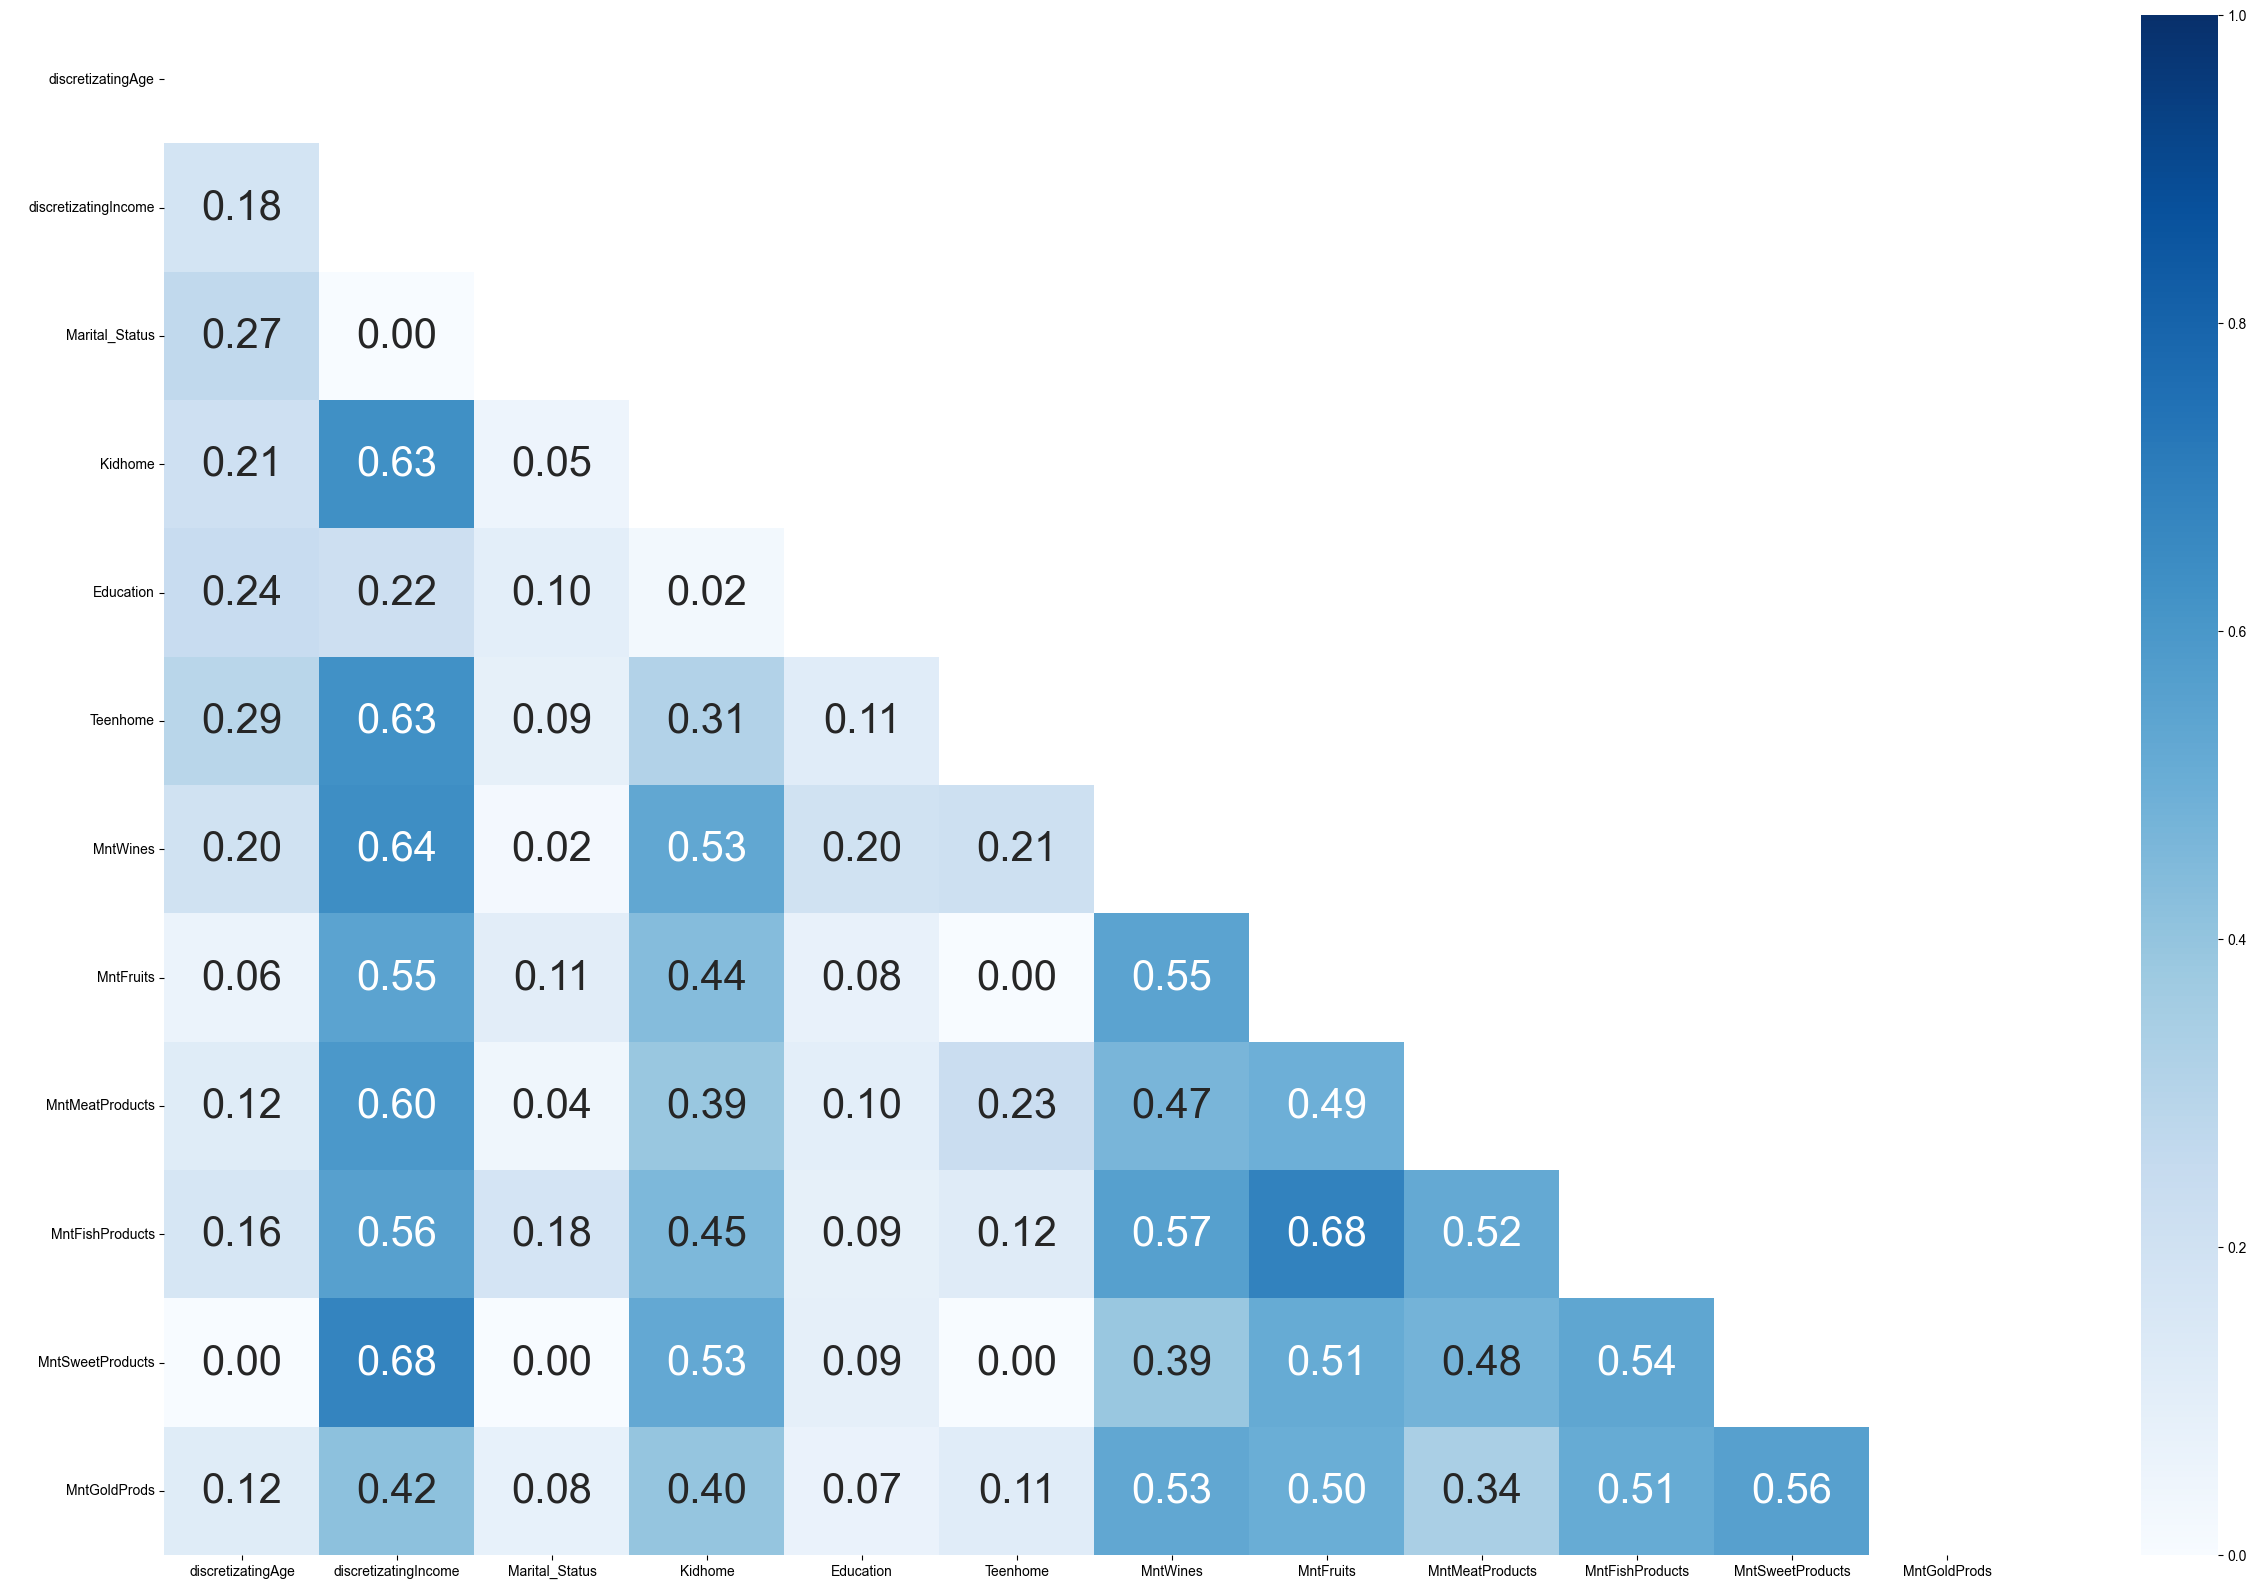

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


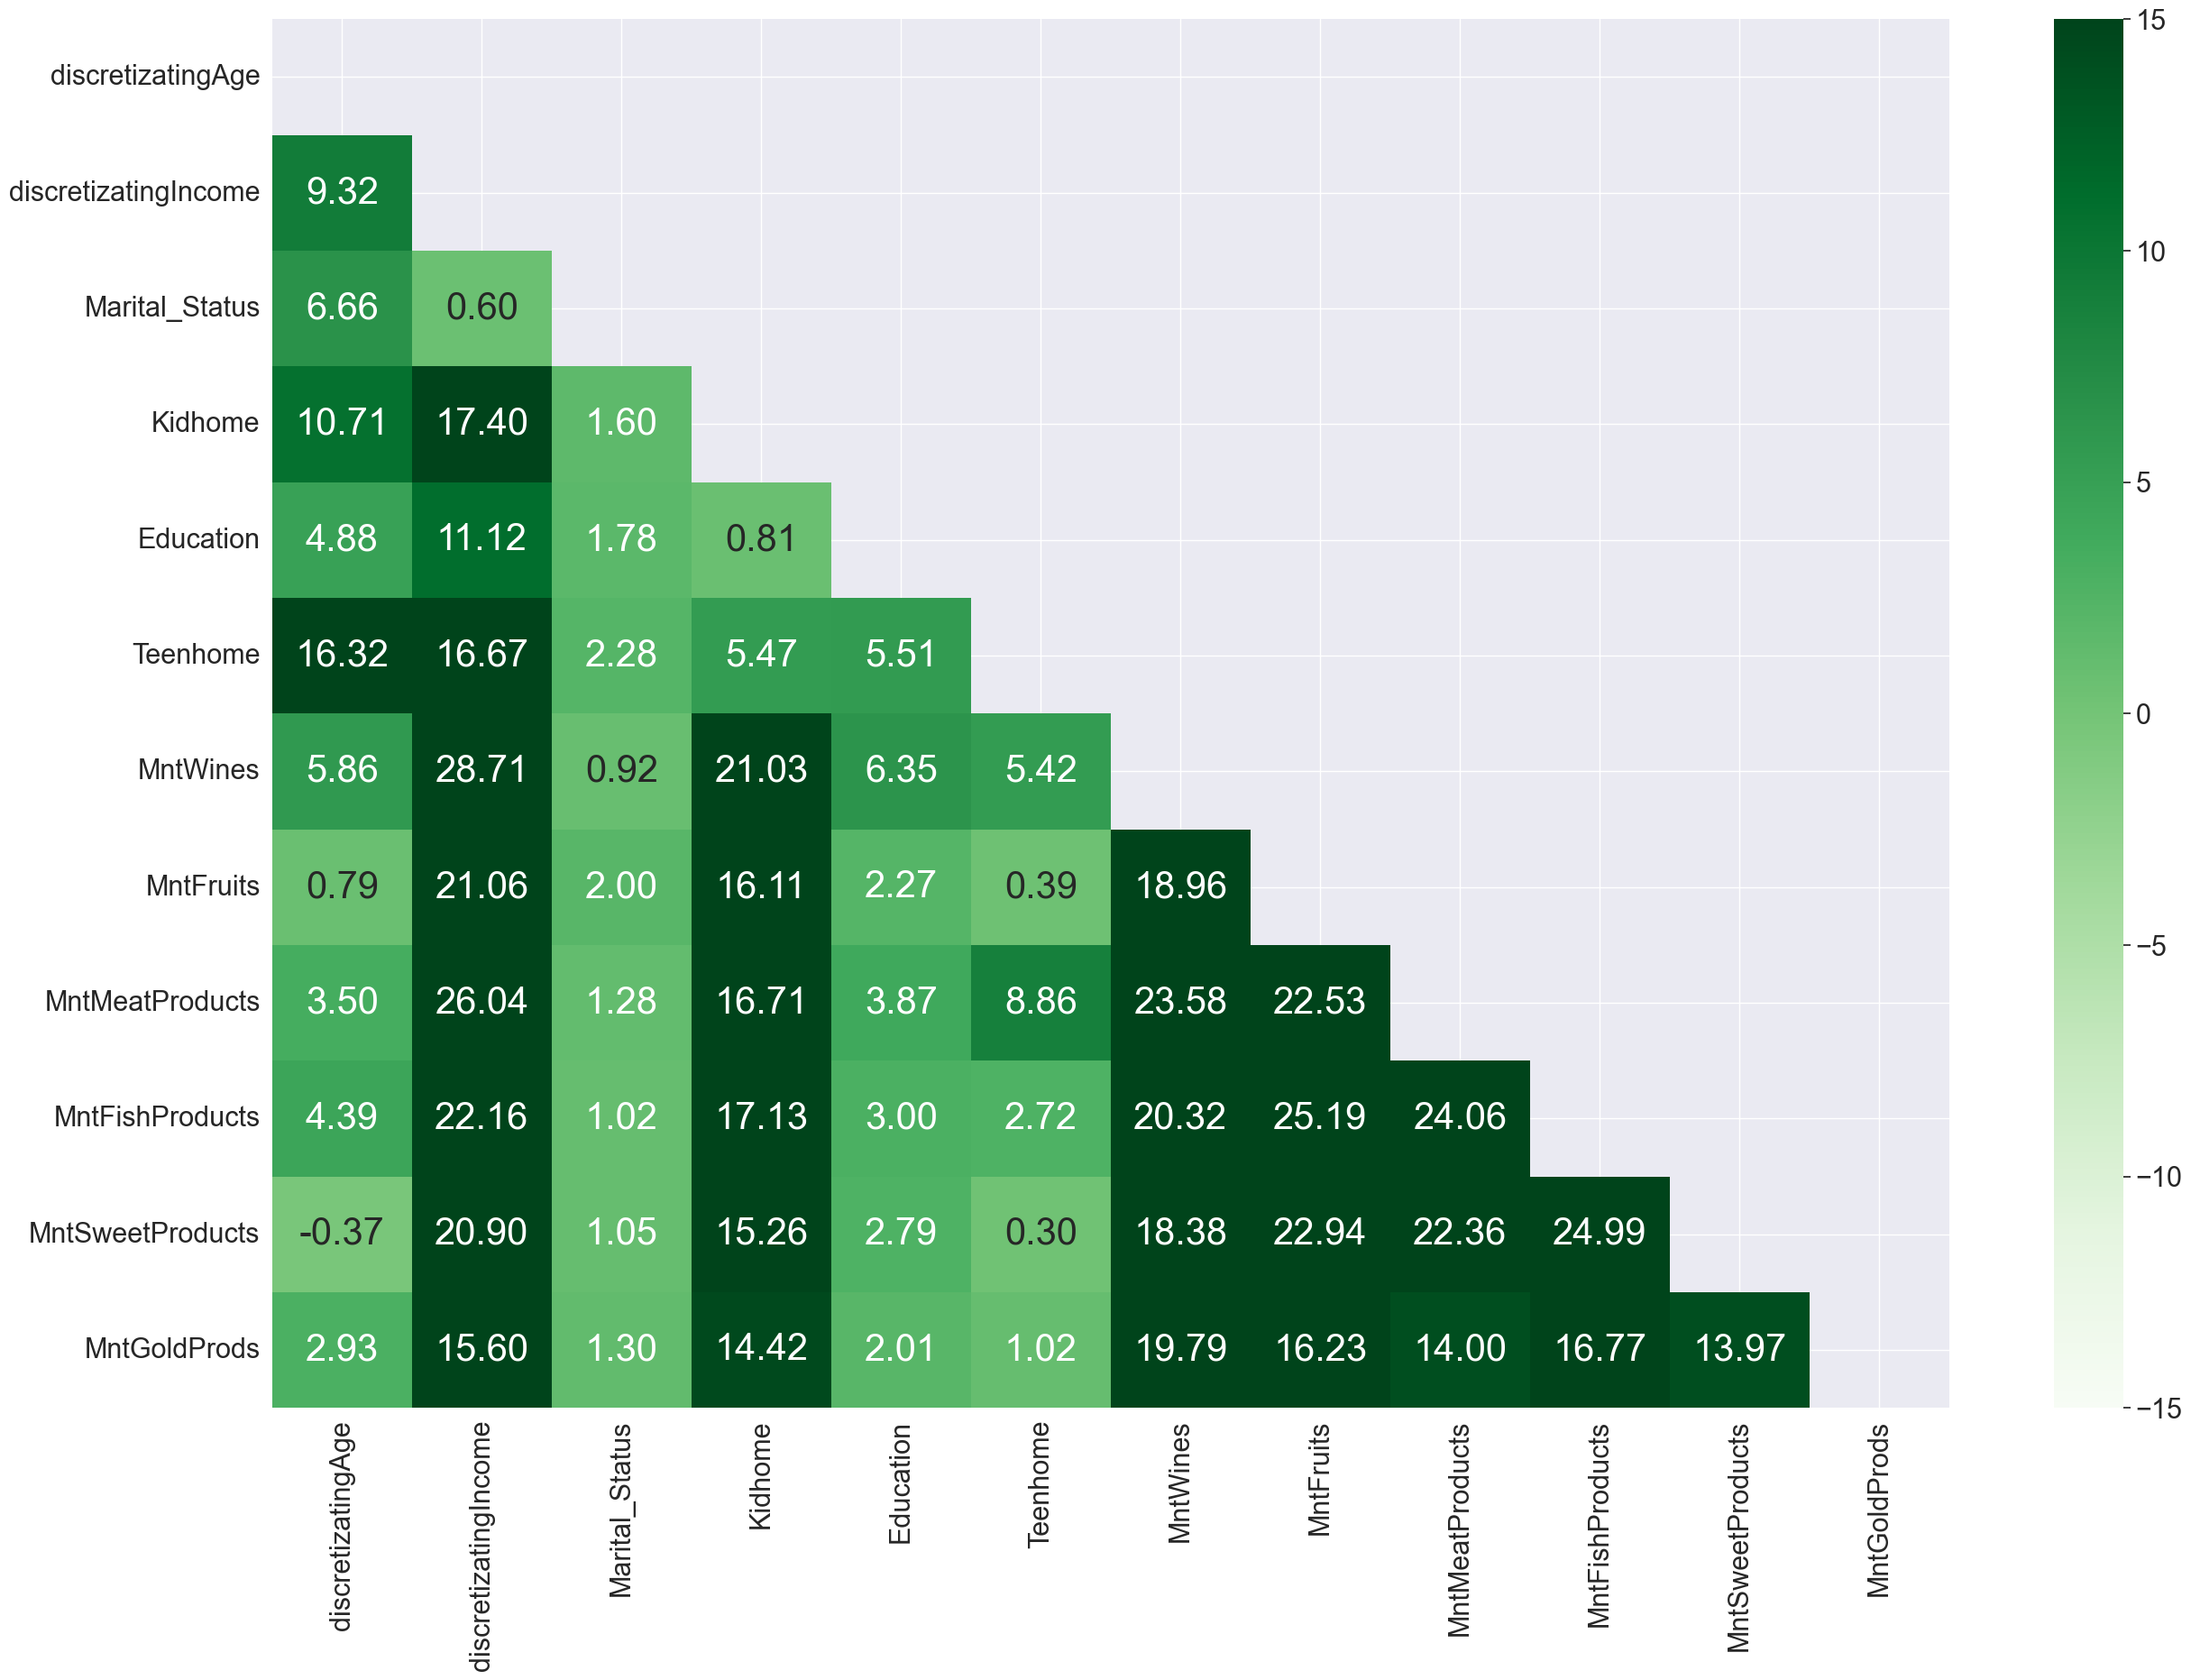

In [7]:
# Check the correlation and signification using phik 

# separating the column that we need beetween customer description(CD) and Goods
dfCDGoods = dfNoAccCamp[['discretizatingAge', 'discretizatingIncome','Marital_Status', 'Kidhome','Education', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(30, 20))
phik_overview = dfCDGoods.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(30, 20))
significance_overview = dfCDGoods.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()


##### **WINES GOODS**

In [31]:
dfWines = dfNoAccCamp[dfNoAccCamp['MntWines'] != 0]
dfWinesCal = dfWines.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntWines':'sum', 'ID' : 'count'})
dfWinesCal.sort_values('MntWines', ascending=False)

MntWines   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome             
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1            10713  \
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1             8615   
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1             7384   
                                              Graduation Together       0       1             7045   
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1             6610   
...                                                                                            ...   
Late middle-aged adults  $0 - $34948.5        Graduation Married        2       0                3   
                                                         Divorced       0       0                3   
                                              Basic      Widow          0       0                3   
Among young              $0 - $34948.5        Master     Together       1       0                2   
                                              Basic      Married        1       0                1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         28  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1         19  
                                              Graduation Together       0       1         18  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
...                                                                                       ..  
Late middle-aged adults  $0 - $34948.5        Graduation Married        2       0          1  
                                                         Divorced       0       0          2  
                                              Basic      Widow          0       0          1  
Among young              $0 - $34948.5        Master     Together       1       0          1  
                                              Basic      Married        1       0          1  

[420 rows x 2 columns]

In [35]:
dfFruits = dfNoAccCamp[dfNoAccCamp['MntFruits'] != 0]
dfFruitsCal = dfFruits.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntFruits':'sum', 'ID' : 'count'})
dfFruitsCal.sort_values('MntFruits', ascending=False)

MntFruits   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome              
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1              1083  \
                         > $67793.5           Graduation Single         0       0               891   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1               846   
Early middle-aged adults > $67793.5           Graduation Married        0       0               756   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1               699   
...                                                                                             ...   
Older Adults             $0 - $34948.5        Master     Widow          0       0                 1   
                                              PhD        Widow          1       1                 1   
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0                 1   
Older Adults             $34948.5 - $67793.5  Master     Single         2       1                 1   
                         $0 - $34948.5        Graduation Together       2       1                 1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         23  
                         > $67793.5           Graduation Single         0       0         11  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         19  
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         15  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Master     Widow          0       0          1  
                                              PhD        Widow          1       1          1  
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0          1  
Older Adults             $34948.5 - $67793.5  Master     Single         2       1          1  
                         $0 - $34948.5        Graduation Together       2       1          1  

[384 rows x 2 columns]

In [37]:
dfFish = dfNoAccCamp[dfNoAccCamp['MntFishProducts'] != 0]
dfFishCal = dfFish.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntFishProducts':'sum', 'ID' : 'count'})
dfFishCal.sort_values('MntFishProducts', ascending=False)

MntFishProducts   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                    
Early middle-aged adults > $67793.5           Graduation Married        0       0                    1301  \
Late middle-aged adults  > $67793.5           Graduation Together       0       0                    1240   
                         $34948.5 - $67793.5  Graduation Married        0       1                    1097   
                         > $67793.5           Graduation Married        0       0                    1013   
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                     995   
...                                                                                                   ...   
Older Adults             $34948.5 - $67793.5  PhD        Widow          0       1                       2   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        2       0                       2   
Early middle-aged adults > $67793.5           PhD        Together       1       1                       2   
Older Adults             $0 - $34948.5        PhD        Together       0       1                       2   
Late middle-aged adults  $0 - $34948.5        PhD        Married        1       1                       1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  > $67793.5           Graduation Together       0       0         10  
                         $34948.5 - $67793.5  Graduation Married        0       1         22  
                         > $67793.5           Graduation Married        0       0         10  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         22  
...                                                                                       ..  
Older Adults             $34948.5 - $67793.5  PhD        Widow          0       1          1  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        2       0          1  
Early middle-aged adults > $67793.5           PhD        Together       1       1          1  
Older Adults             $0 - $34948.5        PhD        Together       0       1          1  
Late middle-aged adults  $0 - $34948.5        PhD        Married        1       1          1  

[389 rows x 2 columns]

In [38]:
dfSweet = dfNoAccCamp[dfNoAccCamp['MntSweetProducts'] != 0]
dfSweetCal = dfSweet.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntSweetProducts':'sum', 'ID' : 'count'})
dfSweetCal.sort_values('MntSweetProducts', ascending=False)

MntSweetProducts   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                     
Early middle-aged adults > $67793.5           Graduation Married        0       0                     1089  \
                         $34948.5 - $67793.5  Graduation Married        0       1                     1017   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                     1006   
Early middle-aged adults > $67793.5           Graduation Married        0       1                      652   
Late middle-aged adults  > $67793.5           Graduation Married        0       0                      616   
...                                                                                                    ...   
                         $34948.5 - $67793.5  Graduation Divorced       1       2                        1   
Early middle-aged adults $0 - $34948.5        PhD        Married        1       1                        1   
                         $34948.5 - $67793.5  Graduation Together       2       1                        1   
                         $0 - $34948.5        PhD        Divorced       1       1                        1   
                         $34948.5 - $67793.5  PhD        Divorced       1       1                        1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults > $67793.5           Graduation Married        0       0         10  
                         $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         24  
Early middle-aged adults > $67793.5           Graduation Married        0       1          7  
Late middle-aged adults  > $67793.5           Graduation Married        0       0         10  
...                                                                                       ..  
                         $34948.5 - $67793.5  Graduation Divorced       1       2          1  
Early middle-aged adults $0 - $34948.5        PhD        Married        1       1          1  
                         $34948.5 - $67793.5  Graduation Together       2       1          1  
                         $0 - $34948.5        PhD        Divorced       1       1          1  
                         $34948.5 - $67793.5  PhD        Divorced       1       1          1  

[381 rows x 2 columns]

In [40]:
dfGold = dfNoAccCamp[dfNoAccCamp['MntGoldProds'] != 0]
dfGoldCal = dfGold.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntGoldProds':'sum', 'ID' : 'count'})
dfGoldCal.sort_values('MntGoldProds', ascending=False)

MntGoldProds   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                 
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                 2160  \
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                 1521   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1                 1289   
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                 1173   
                         > $67793.5           Graduation Married        0       0                 1134   
...                                                                                                ...   
Older Adults             $0 - $34948.5        Graduation Together       2       1                    1   
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0                    1   
Late middle-aged adults  $0 - $34948.5        PhD        Married        2       0                    1   
Older Adults             $34948.5 - $67793.5  Graduation Married        1       2                    1   
                         $0 - $34948.5        Graduation Divorced       2       1                    1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         27  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         18  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
                         > $67793.5           Graduation Married        0       0         12  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Graduation Together       2       1          1  
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0          1  
Late middle-aged adults  $0 - $34948.5        PhD        Married        2       0          1  
Older Adults             $34948.5 - $67793.5  Graduation Married        1       2          1  
                         $0 - $34948.5        Graduation Divorced       2       1          1  

[417 rows x 2 columns]

### 2. How to increase 25% of sales on places viewed from customer purchase history which is influenced by **customer behavior**?

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


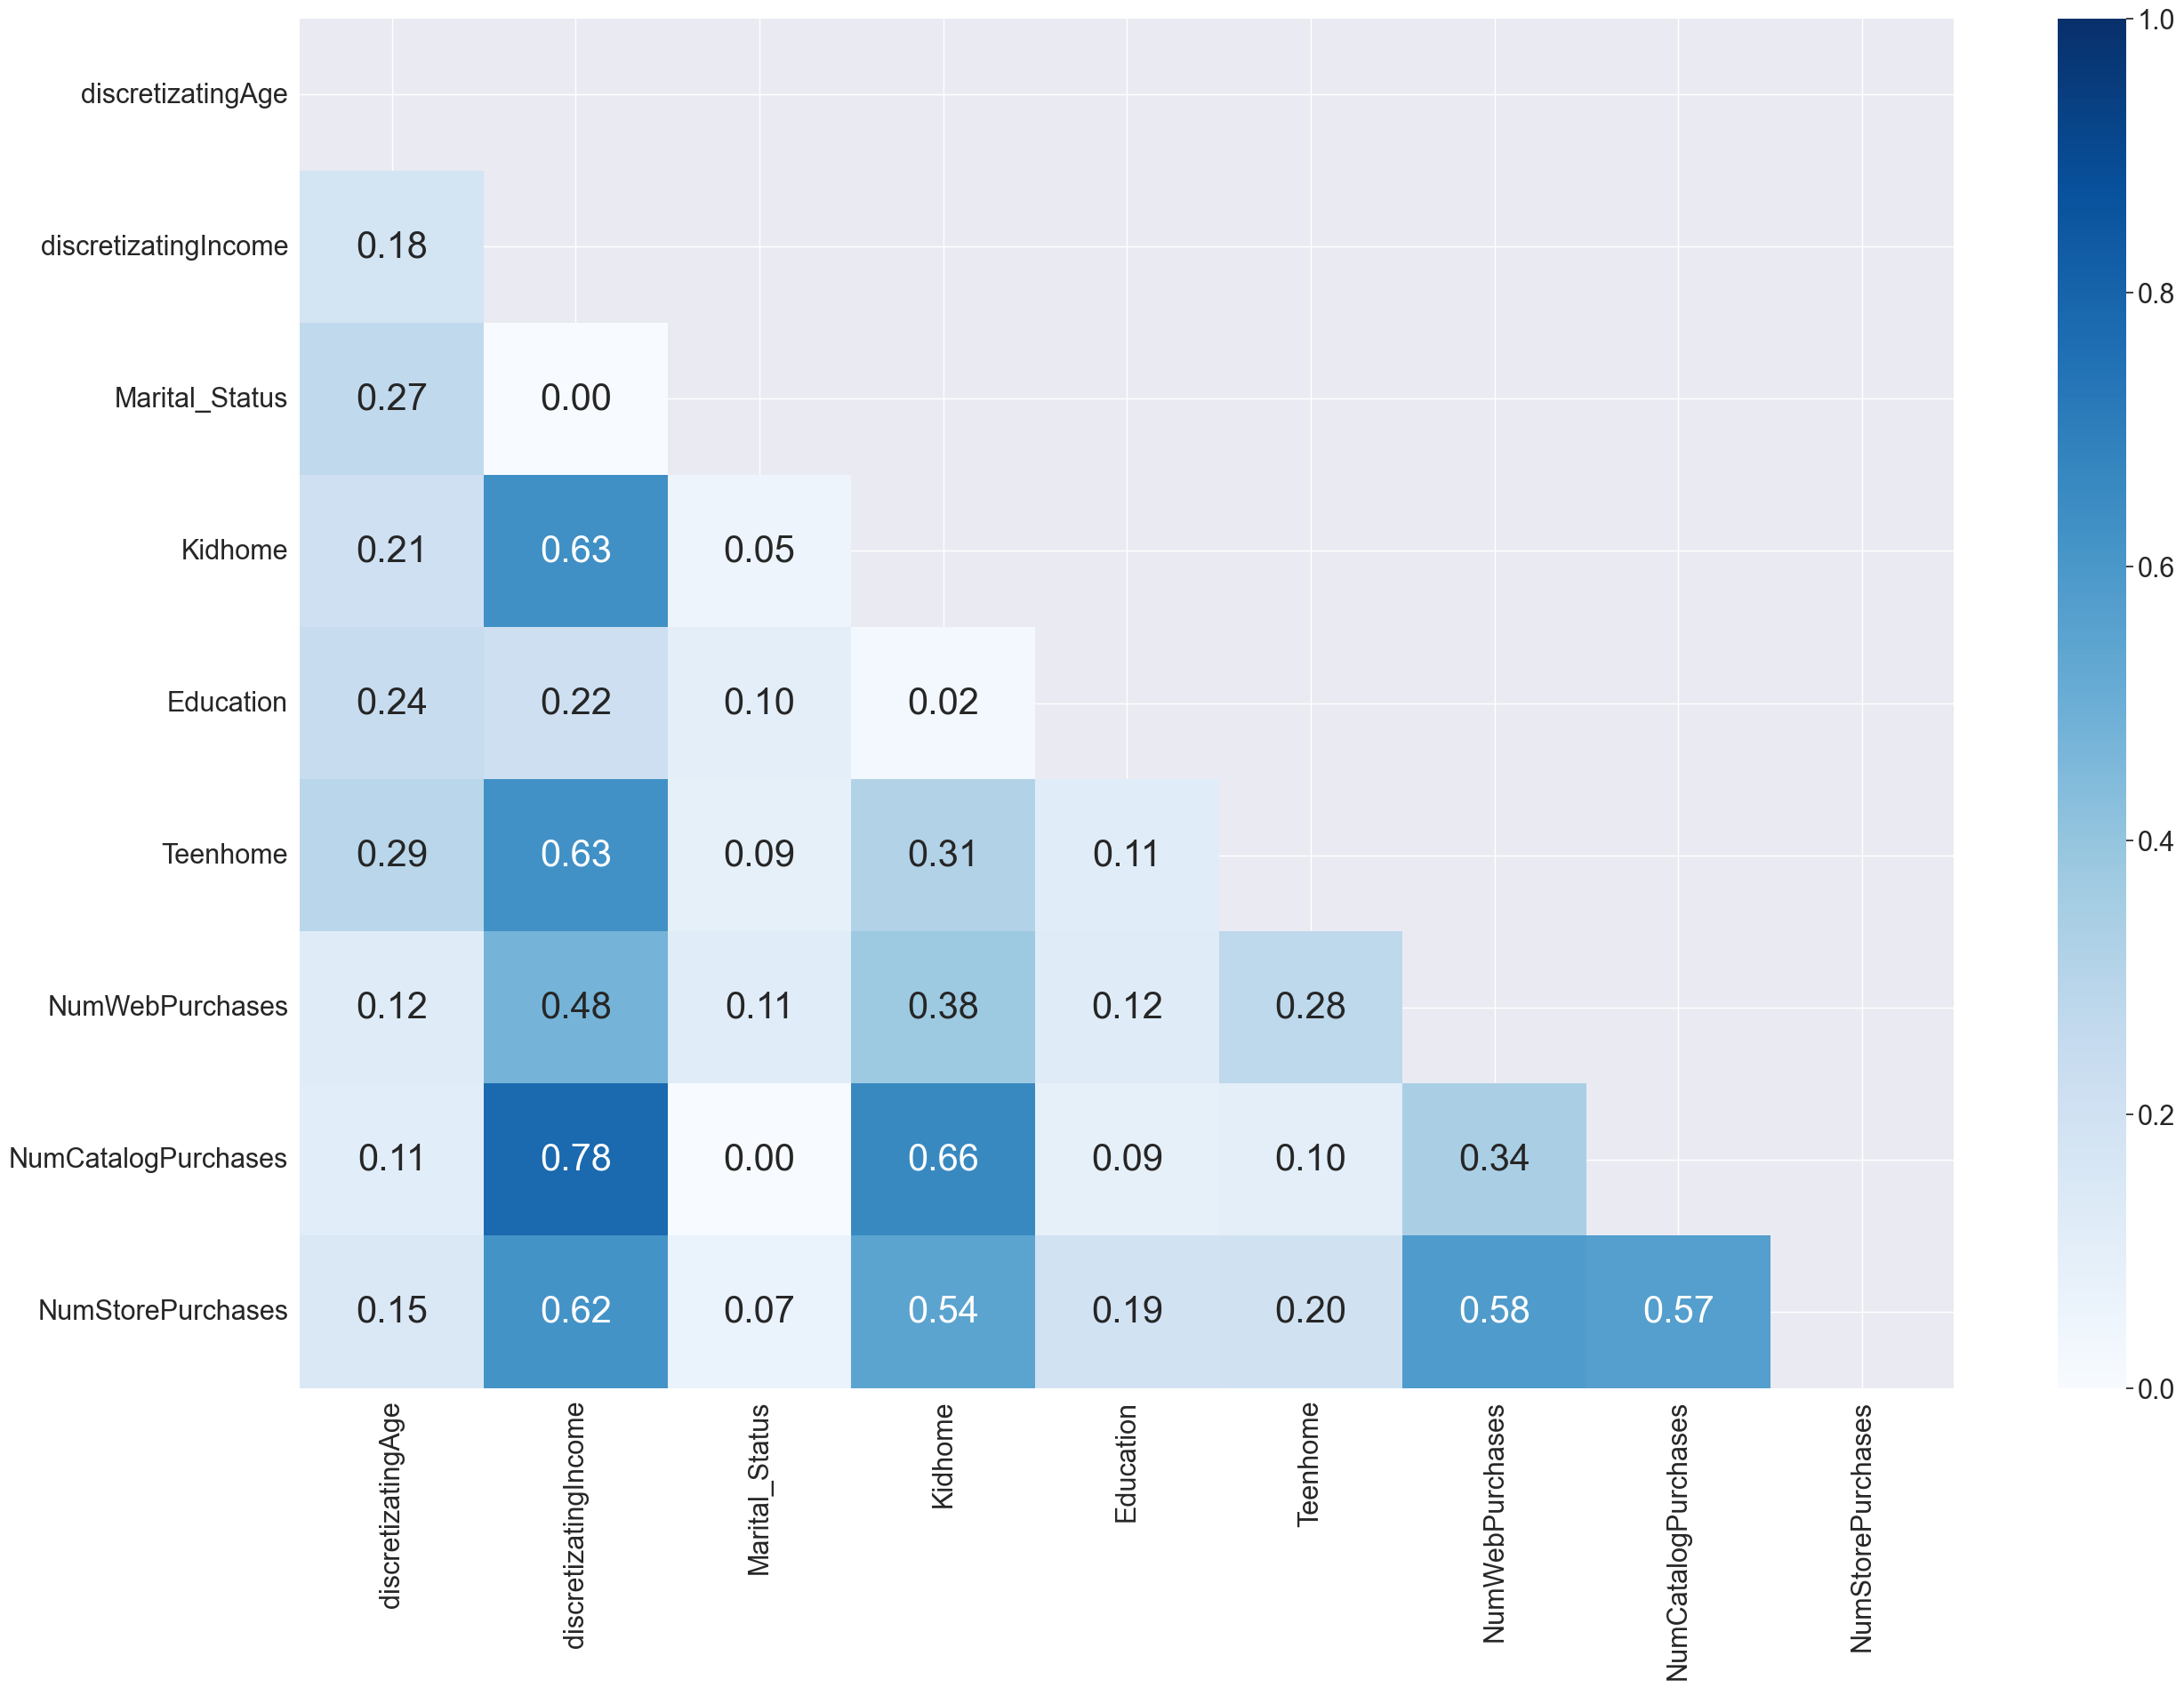

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


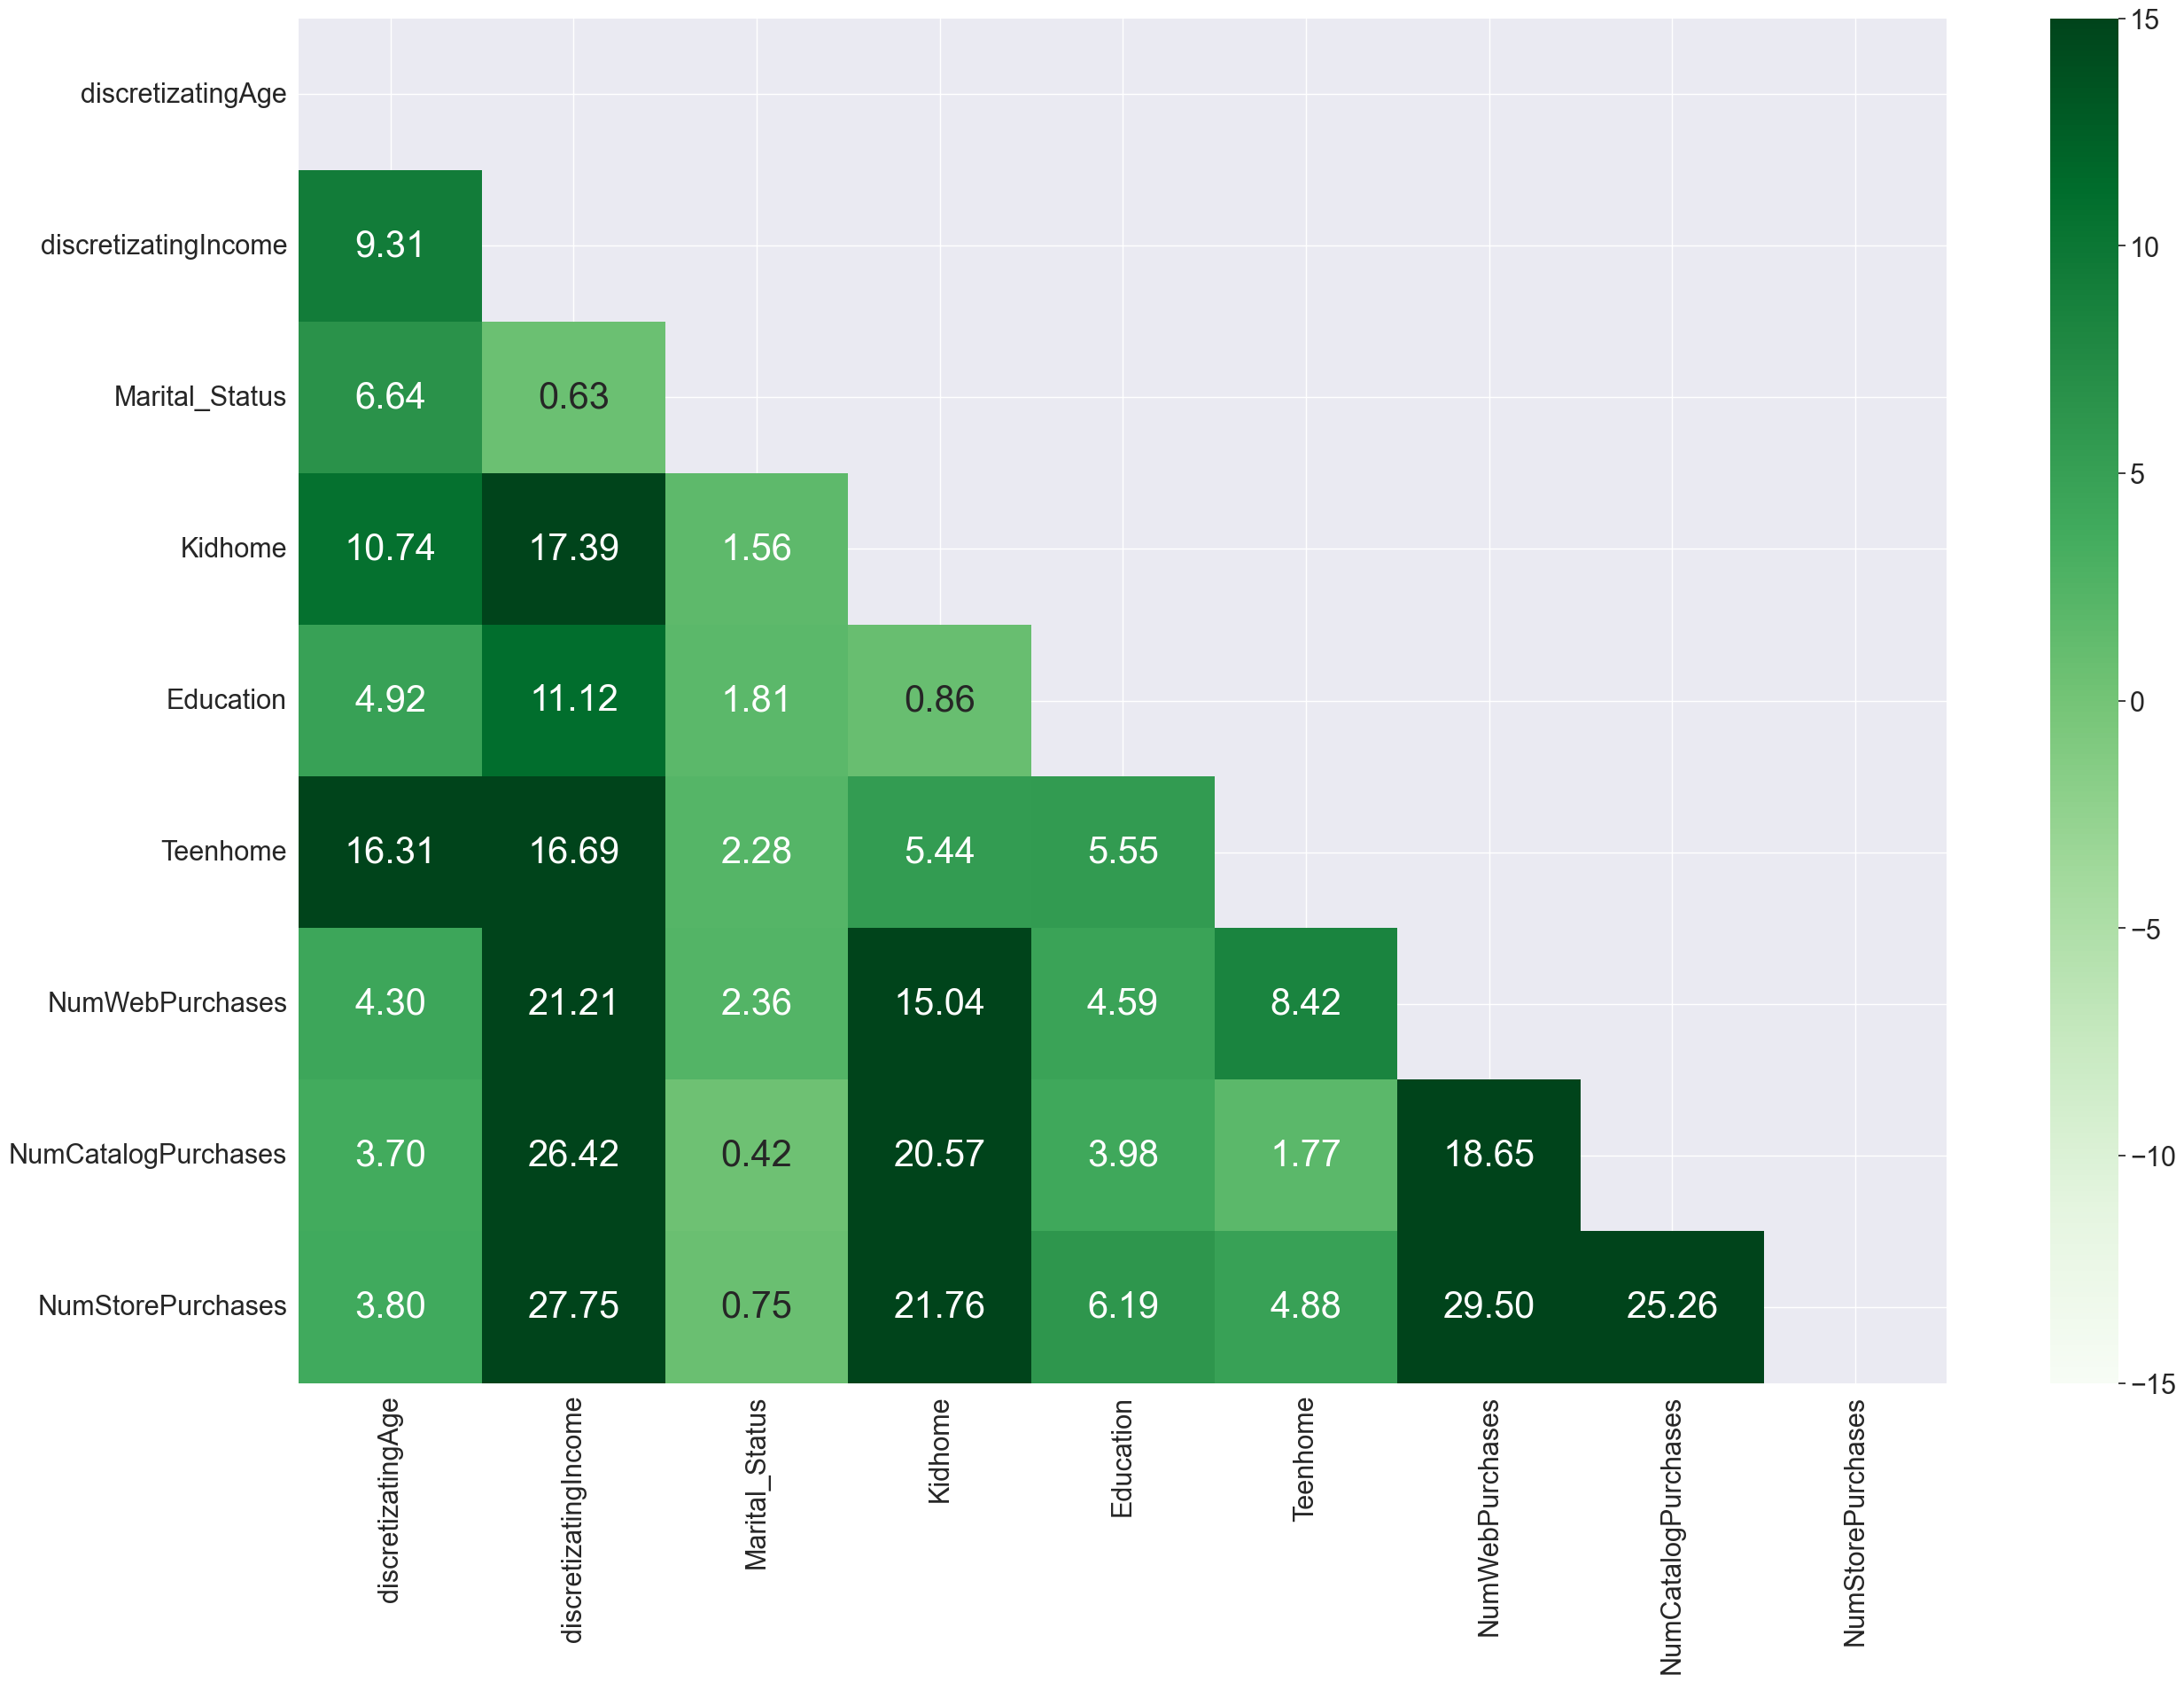

In [43]:
# Check the correlation and signification using phik 

# separating the column that we need beetween customer description(CD) and Place
dfCDPlace = dfNoAccCamp[['discretizatingAge', 'discretizatingIncome','Marital_Status', 'Kidhome','Education', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(30, 20))
phik_overview = dfCDPlace.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(30, 20))
significance_overview = dfCDPlace.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()


In [48]:
dfWeb = dfNoAccCamp[dfNoAccCamp['NumWebPurchases'] != 0]
dfWebCal = dfWeb.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumWebPurchases':'sum', 'ID' : 'count'})
dfWebCal.sort_values('NumWebPurchases', ascending=False)

NumWebPurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                    
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                     169  \
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                     144   
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                     120   
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1                     100   
                                              Graduation Together       0       1                      98   
...                                                                                                   ...   
Early middle-aged adults $0 - $34948.5        Basic      Married        0       1                       1   
                                                         Divorced       1       0                       1   
                                              Graduation Together       2       1                       1   
                                              Master     Divorced       0       0                       1   
                                              Basic      Single         1       1                       1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         28  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1         19  
                                              Graduation Together       0       1         18  
...                                                                                       ..  
Early middle-aged adults $0 - $34948.5        Basic      Married        0       1          1  
                                                         Divorced       1       0          1  
                                              Graduation Together       2       1          1  
                                              Master     Divorced       0       0          1  
                                              Basic      Single         1       1          1  

[417 rows x 2 columns]

In [46]:
dfCatalog = dfNoAccCamp[dfNoAccCamp['NumCatalogPurchases'] != 0]
dfCatalogCal = dfCatalog.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumCatalogPurchases':'sum', 'ID' : 'count'})
dfCatalogCal.sort_values('NumCatalogPurchases', ascending=False)

NumCatalogPurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                        
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                          89  \
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                          80   
Early middle-aged adults > $67793.5           Graduation Married        0       0                          76   
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1                          71   
Early middle-aged adults > $67793.5           Graduation Together       0       0                          65   
...                                                                                                       ...   
Older Adults             $0 - $34948.5        Graduation Married        1       1                           1   
                                                                        0       0                           1   
Early middle-aged adults $0 - $34948.5        PhD        Married        0       0                           1   
Late middle-aged adults  $0 - $34948.5        Master     Married        2       0                           1   
Among young              $0 - $34948.5        Basic      Married        0       0                           1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         23  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         25  
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1         19  
Early middle-aged adults > $67793.5           Graduation Together       0       0          7  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Graduation Married        1       1          1  
                                                                        0       0          1  
Early middle-aged adults $0 - $34948.5        PhD        Married        0       0          1  
Late middle-aged adults  $0 - $34948.5        Master     Married        2       0          1  
Among young              $0 - $34948.5        Basic      Married        0       0          1  

[340 rows x 2 columns]

In [47]:
dfStore = dfNoAccCamp[dfNoAccCamp['NumStorePurchases'] != 0]
dfStoreCal = dfStore.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumStorePurchases':'sum', 'ID' : 'count'})
dfStoreCal.sort_values('NumStorePurchases', ascending=False)

NumStorePurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                       201  \
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                       191   
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                       159   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1                       150   
                                              PhD        Married        0       1                       146   
...                                                                                                     ...   
                                              Graduation Widow          1       0                         2   
Early middle-aged adults > $67793.5           PhD        Together       1       1                         1   
Late middle-aged adults  $0 - $34948.5        PhD        Single         0       2                         1   
Older Adults             $0 - $34948.5        PhD        Together       0       1                         1   
Late middle-aged adults  > $67793.5           Master     Together       1       0                         1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         28  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         18  
                                              PhD        Married        0       1         19  
...                                                                                       ..  
                                              Graduation Widow          1       0          1  
Early middle-aged adults > $67793.5           PhD        Together       1       1          1  
Late middle-aged adults  $0 - $34948.5        PhD        Single         0       2          1  
Older Adults             $0 - $34948.5        PhD        Together       0       1          1  
Late middle-aged adults  > $67793.5           Master     Together       1       0          1  

[421 rows x 2 columns]

In [41]:
# pd.set_option('display.max_columns', 50)
# dfCountWines = dfNoAccCamp[(dfNoAccCamp['discretizatingAge'] == 'Early middle-aged adults') & (dfNoAccCamp['discretizatingIncome'] == '$0 - $34948.5') & (dfNoAccCamp['Education'] == 'Graduation') & (dfNoAccCamp['Marital_Status'] == 'Married') & (dfNoAccCamp['Kidhome'] == 1) & (dfNoAccCamp['Teenhome'] == 0)]
# dfCountWines

In [15]:
a = pd.crosstab(df.discretizatingAge, df.discretizatingIncome)
a


discretizatingIncome,$0 - $34948.5,$34948.5 - $67793.5,> $67793.5
discretizatingAge,,,
Among young,40,18,33
Early middle-aged adults,265,321,170
Late middle-aged adults,188,476,210
Older Adults,54,305,160


In [16]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pba = (40/2240)/(Pa)

Prob = Pa*Pba
Prob*2240

40.0

In [17]:
def ExpectatedVals(a, x, y):
    sumRows = a[x].values.sum()
    sumCols = a.loc[y].values.sum()
    
    return sumRows, sumCols
    

In [18]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pb = (a['$0 - $34948.5'].values.sum()/len(df))
PAnB = Pa*Pb 
# peluang Among young berpenghasilan 0-34948.5
prob1 = Pa*((PAnB)/Pa)
prob1

0.009920479910714286

In [19]:
df.loc[(df.discretizatingIncome == '$0 - $34948.5') & (df.discretizatingAge == 'Among young')]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campignAccept,discretizatingAge,discretizatingIncome
28,6864,1989,Master,34,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
43,9909,1996,Master,27,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,1,Accepted once or more,Among young,$0 - $34948.5
318,663,1989,PhD,34,Single,33996.0,0,0,2013-09-11,46,40,2,15,8,0,6,1,1,1,3,4,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
364,4459,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,10,4,14,4,4,1,1,1,0,3,8,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
415,5987,1989,Master,34,Together,10404.0,1,0,2014-05-04,52,2,2,11,10,6,12,2,1,0,4,5,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
427,5012,1989,Graduation,34,Married,28691.0,1,0,2013-07-04,56,5,4,13,8,0,4,1,1,0,3,8,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
430,10642,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,10,4,14,4,4,1,1,1,0,3,8,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
489,8151,1990,Basic,33,Married,24279.0,0,0,2012-12-29,6,16,36,21,20,62,108,1,4,1,3,8,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
495,3386,1992,Graduation,31,Married,34935.0,0,0,2013-06-21,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
504,10203,1990,Graduation,33,Single,26095.0,1,0,2013-06-30,77,11,7,9,3,1,11,1,1,0,3,7,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5


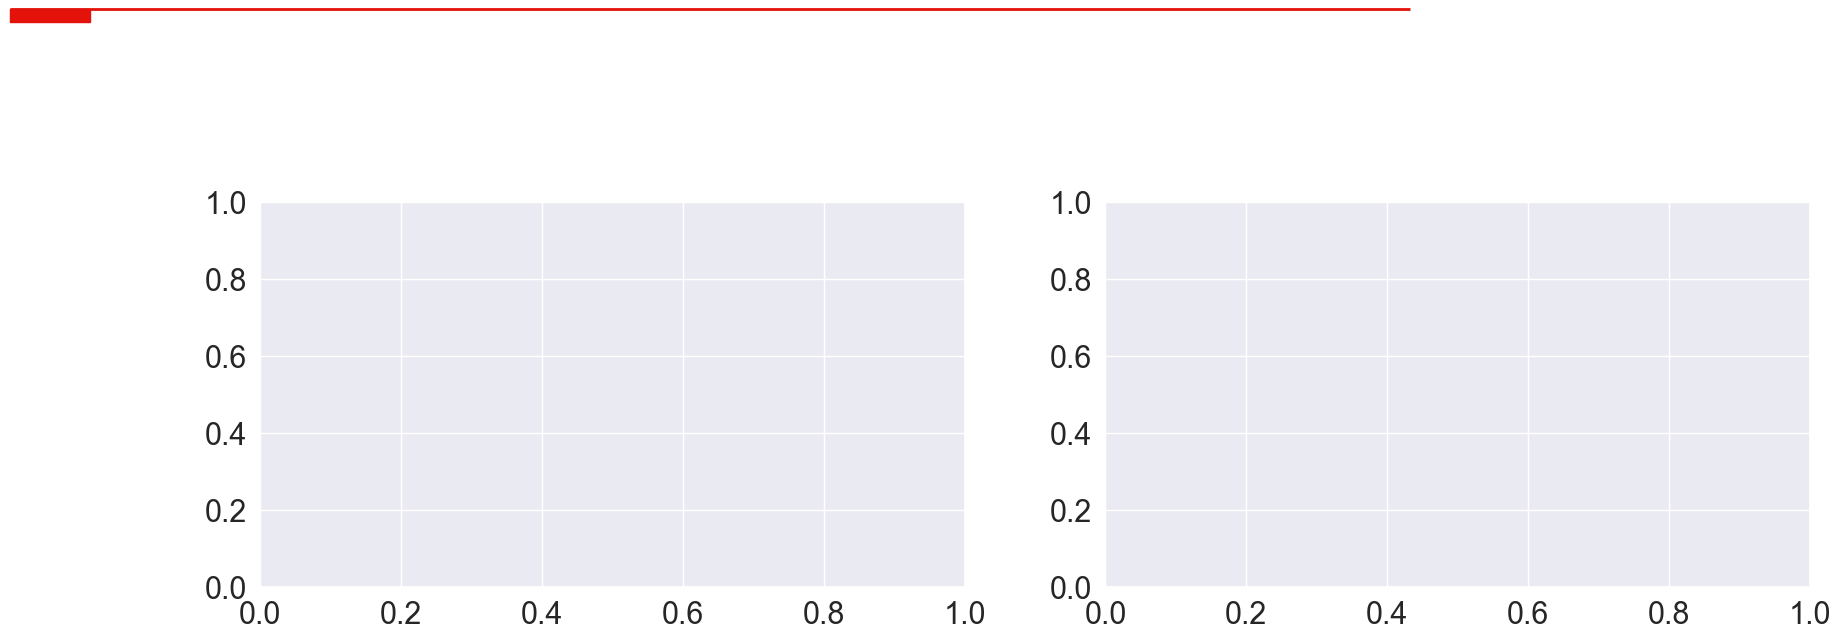

In [20]:
# Inisialisasi parameter gambar
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))